# 1- Exploratory analysis

In [18]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
os.chdir("C:\\Users\\Julian\\Desktop\\DATA\\Proyectos DS\\BreastCancer")

df = pd.read_csv("data.csv")

df.head()


In [5]:
print(df.size)
df.shape


18777


(569, 33)

#### Cleaning the data

In [6]:
#Null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
#Duplicated values
df.duplicated().sum()

0

The dataset consists of 569 rows and 33 columns. 
Each row represent a specific patient, with an specific id number. 

There are no null values or duplicated values in the dataset.

## Columns Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In this dataset, the features are derived from a digitized image of a fine needle aspirate (FNA) of a breast mass, encompassing detailed descriptions of the characteristics exhibited by the cell nuclei present in the image. For each cell nucleus, a set of ten real-valued features are computed:

        Radius (mean of distances from center to points on the perimeter)

        Texture (standard deviation of gray-scale values)

        Perimeter

        Area

        Smoothness (local variation in radius lengths)

        Compactness (perimeter^2 / area - 1.0)

        Concavity (severity of concave portions of the contour)

        Concave points (number of concave portions of the contour)

        Symmetry

        Fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image,resulting in 30 features.
Most of the features are floats except for diagnosis (the target variable) which is an object with two values:
                        
                        M = malignous
                        B = benignus

### Descriptive Statistics

In [10]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

Since the different variables exhibit varying scales, it is essential to scale the variables when utilizing distance-based algorithms to achieve more accurate results.

# Data visualization

## Density plot 


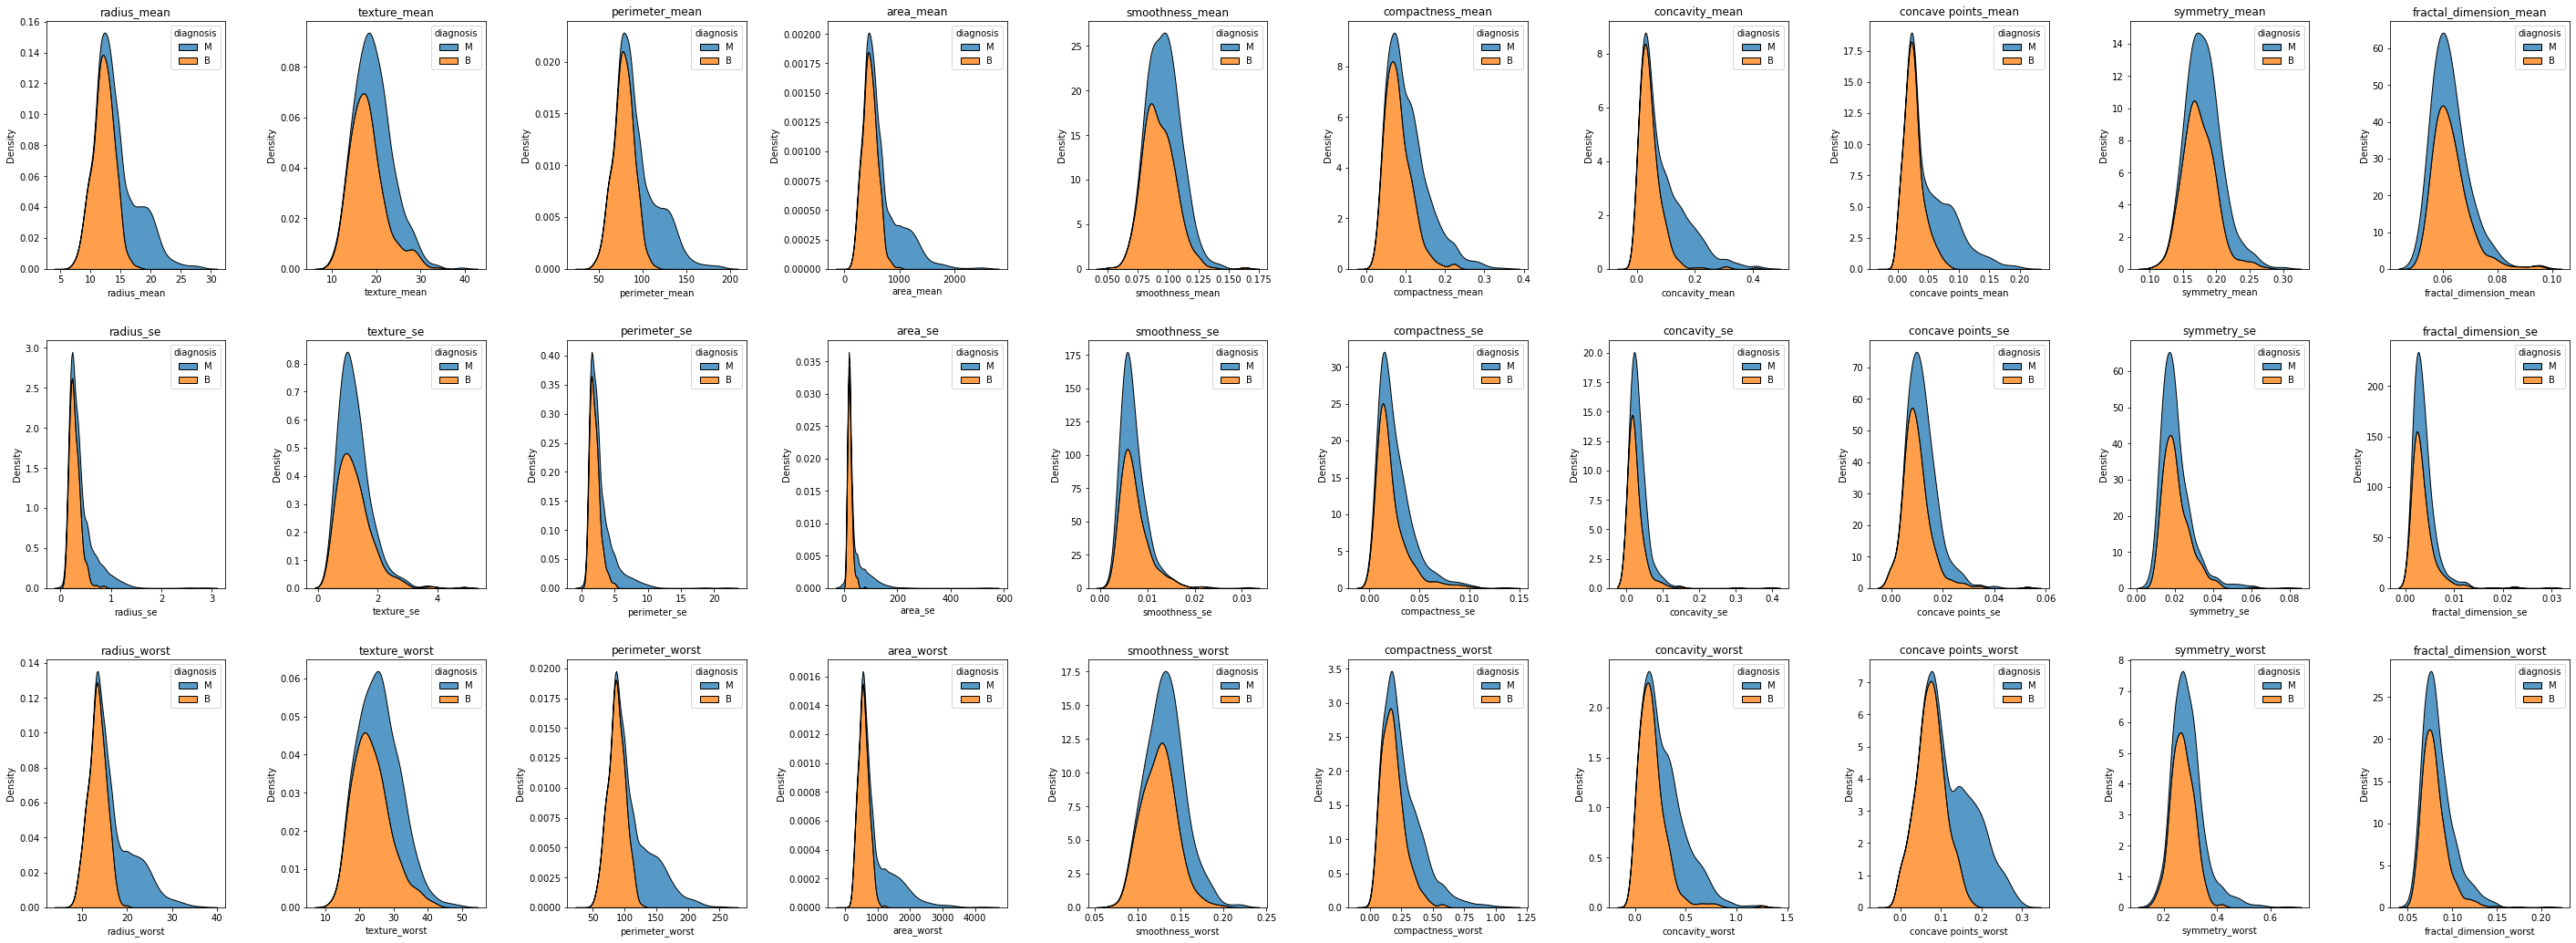

In [11]:
plt.figure(1 , figsize = (40 , 15))

n = 0 
for x in ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst',]:
    n += 1
    plt.subplot(3 , 10, n)
    plt.subplots_adjust(hspace = 3 , wspace =3)
    plt.tight_layout(pad=3)
    sns.kdeplot(data=df, x=df[x], hue=df["diagnosis"], multiple="stack")
    plt.title('{}'.format(x))

In the density plots, the peaks show where values are concentrated. 

Among the features,  some exhibit a normal distribution. For example, texture_mean, texture_se, texture_worst, smoothness_mean, smoothness_se, smoothness_worst, concave points_se, symmetry_mean, symmetry_se, symmetry_worst, fractal_dimension_mean, fractal_dimension_se, and fractal_dimension_worst.

In this dataset, malignant tumors generally exhibit higher feature values. However, there are instances of breast carcinomas labeled as malignant that share similar feature values with the majority of benign tumors.

## Box-Plot & Swarm-Plot

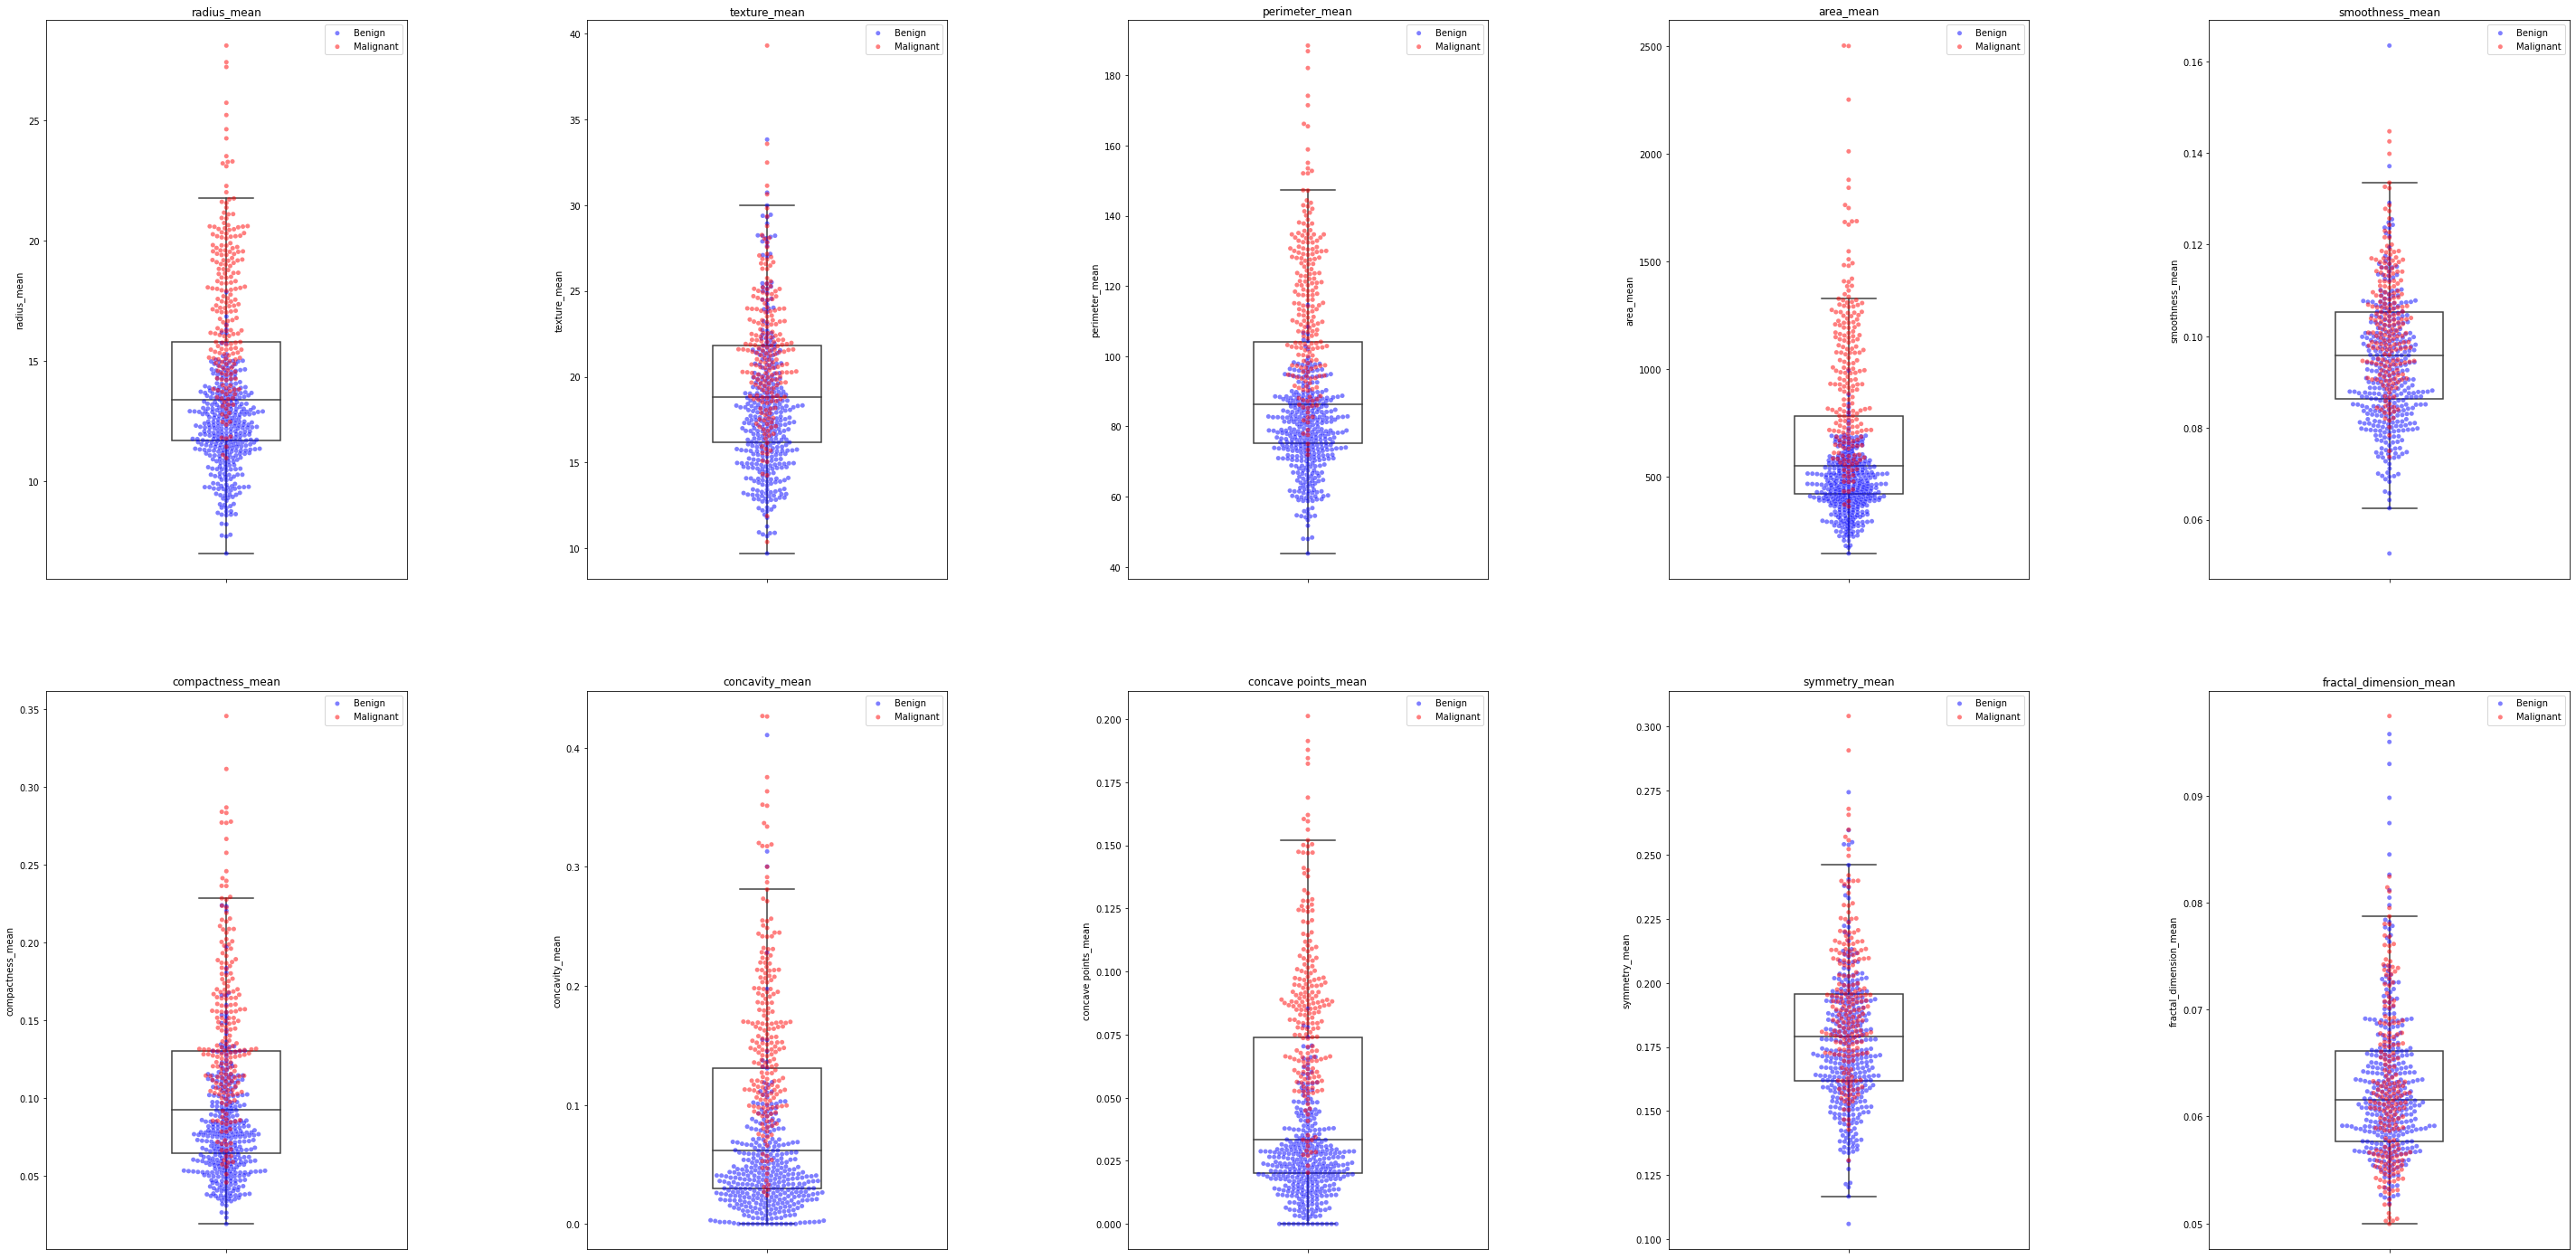

In [12]:
#Mean features

plt.figure(1, figsize=(50, 25))

n = 0
for x in ['radius_mean', 'texture_mean', 'perimeter_mean',
          'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
          'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']:
    n += 1
    plt.subplot(2, 5, n)
    plt.subplots_adjust(hspace=0.2, wspace=0.5)  # Adjust spacing between subplots

    condition1 = df["diagnosis"] == "B"
    condition2 = df["diagnosis"] == "M" 
    sns.boxplot(data=df, y=x, width=0.3, showcaps=True, boxprops=dict(facecolor='none'), showfliers=False)
    sns.swarmplot(data=df.loc[condition1], y=x, color='blue', alpha=0.5, label='Benign') 
    sns.swarmplot(data=df.loc[condition2], y=x, color='red', alpha=0.5, label='Malignant')
    plt.legend()  # Agregar leyenda para identificar los colores
    plt.title('{}'.format(x))

plt.show()

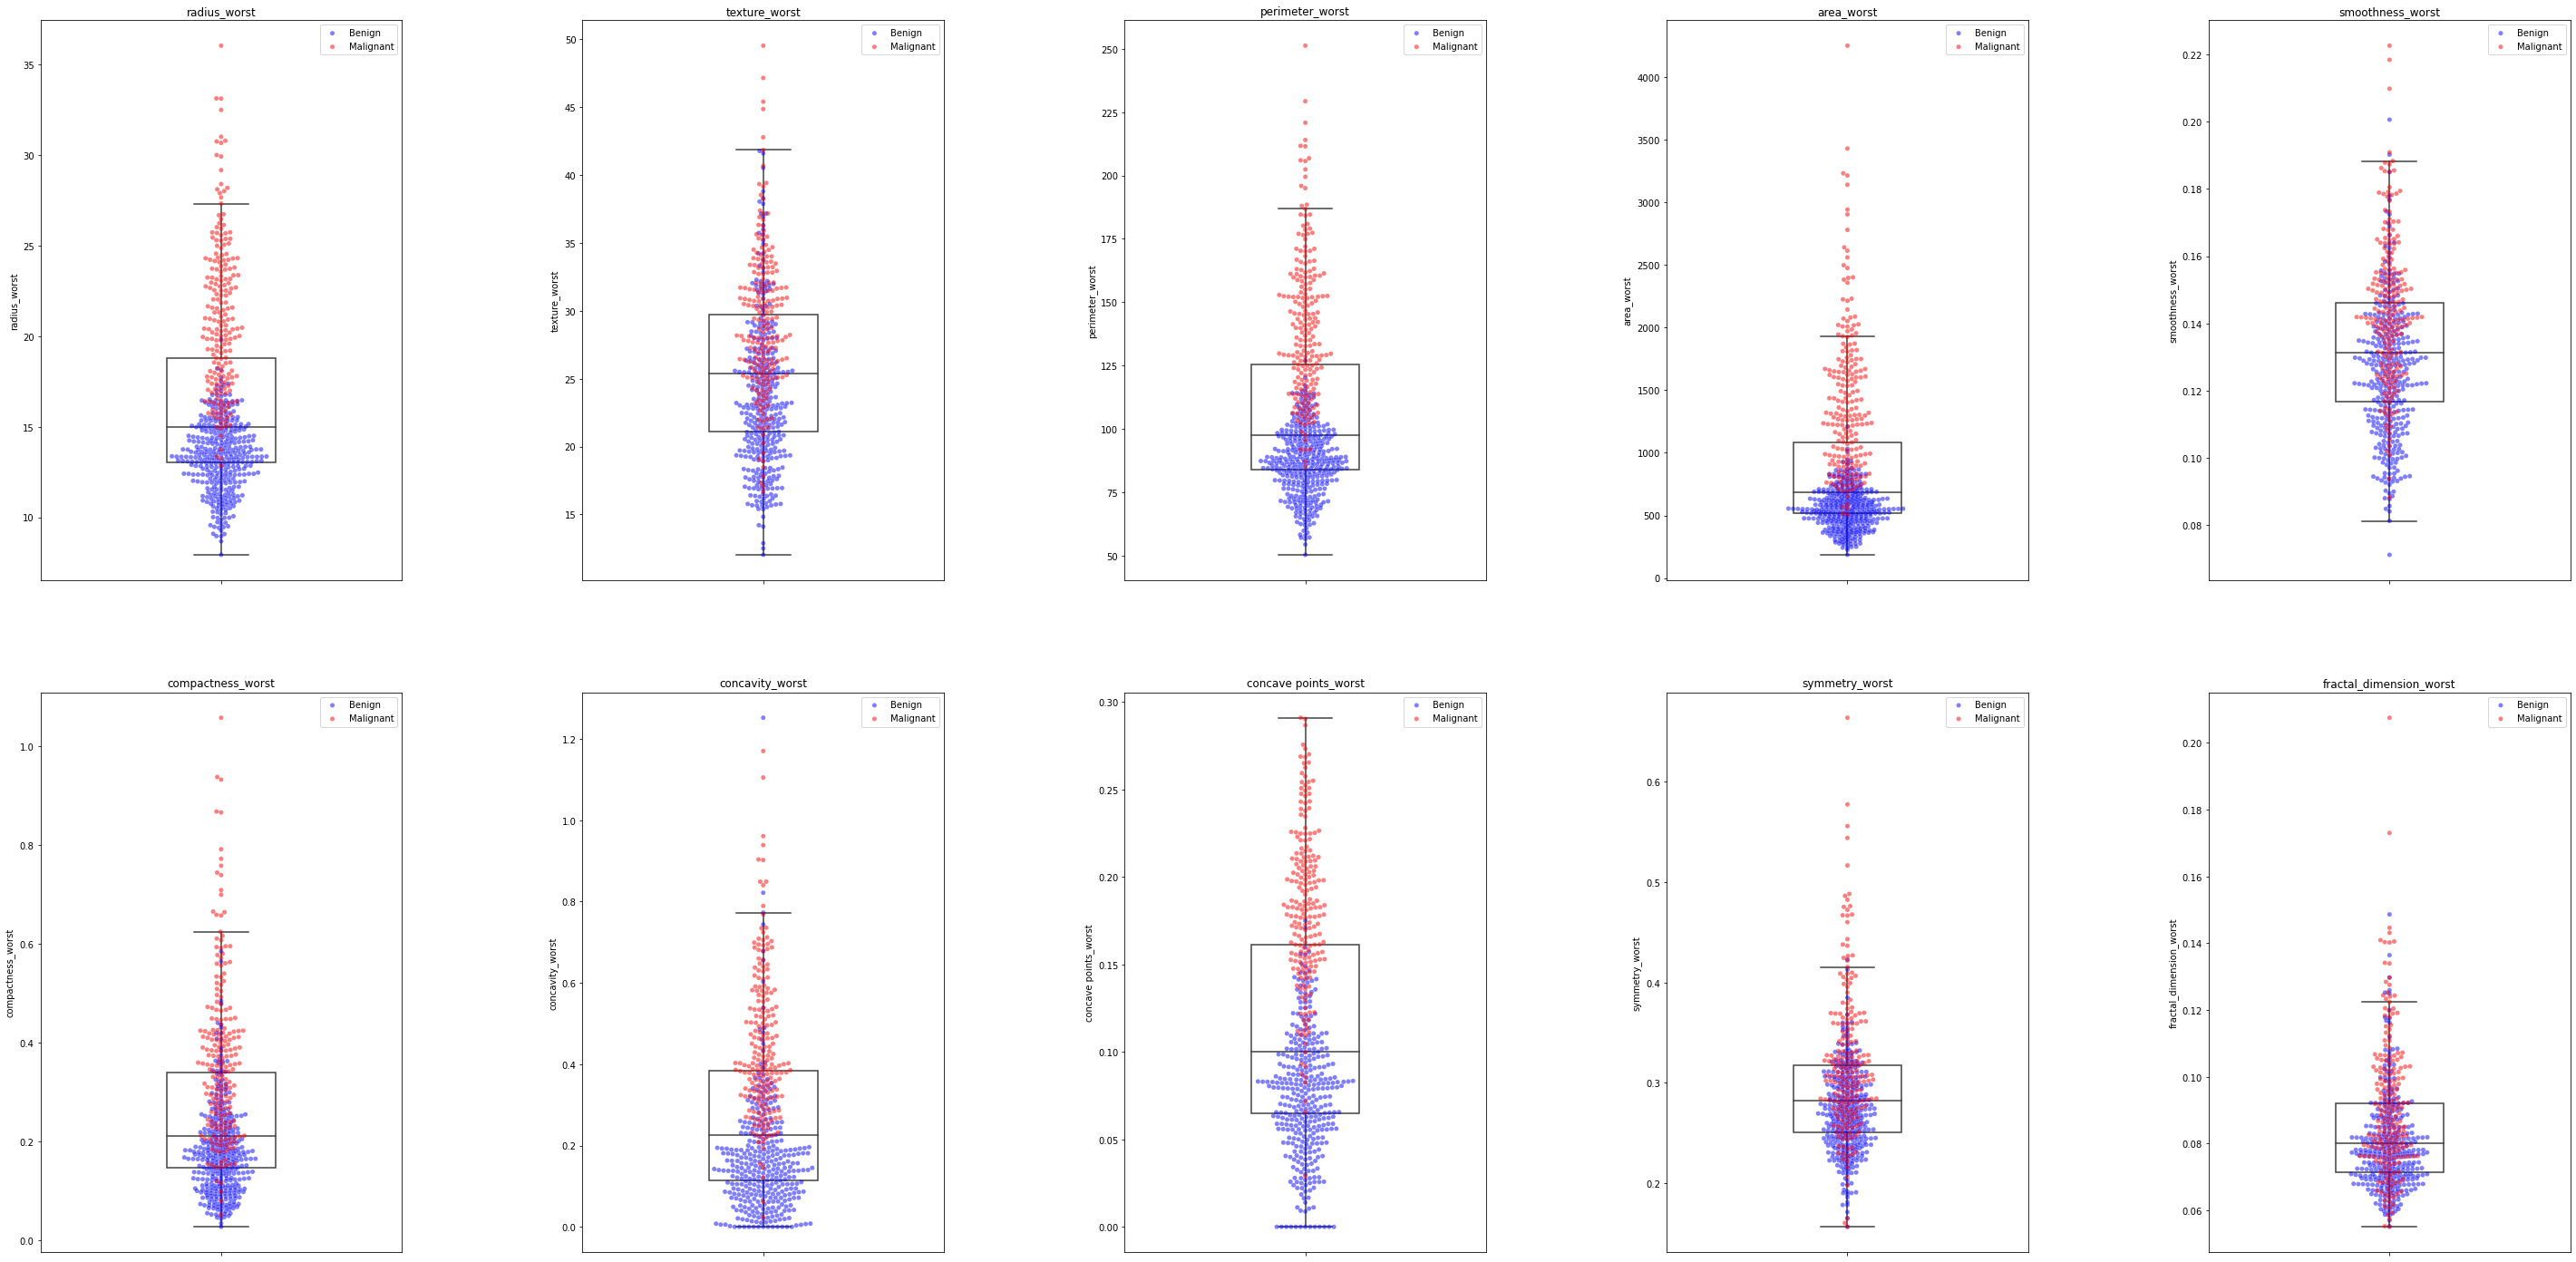

In [13]:
#Worst features
plt.figure(1, figsize=(50, 25))

n = 0
for x in ['radius_worst', 'texture_worst',
            'perimeter_worst', 'area_worst', 'smoothness_worst',
            'compactness_worst', 'concavity_worst', 'concave points_worst',
            'symmetry_worst', 'fractal_dimension_worst',]:
    n += 1
    plt.subplot(2, 5, n)
    plt.subplots_adjust(hspace=0.2, wspace=0.5)  # Adjust spacing between subplots
#Select B & M
    condition1 = df["diagnosis"] == "B"
    condition2 = df["diagnosis"] == "M" 
    sns.boxplot(data=df, y=x, width=0.3, showcaps=True, boxprops=dict(facecolor='none'), showfliers=False)
    sns.swarmplot(data=df.loc[condition1], y=x, color='blue', alpha=0.5, label='Benign') 
    sns.swarmplot(data=df.loc[condition2], y=x, color='red', alpha=0.5, label='Malignant')
    plt.legend()  # Agregar leyenda para identificar los colores
    plt.title('{}'.format(x))

plt.show()
plt.show()

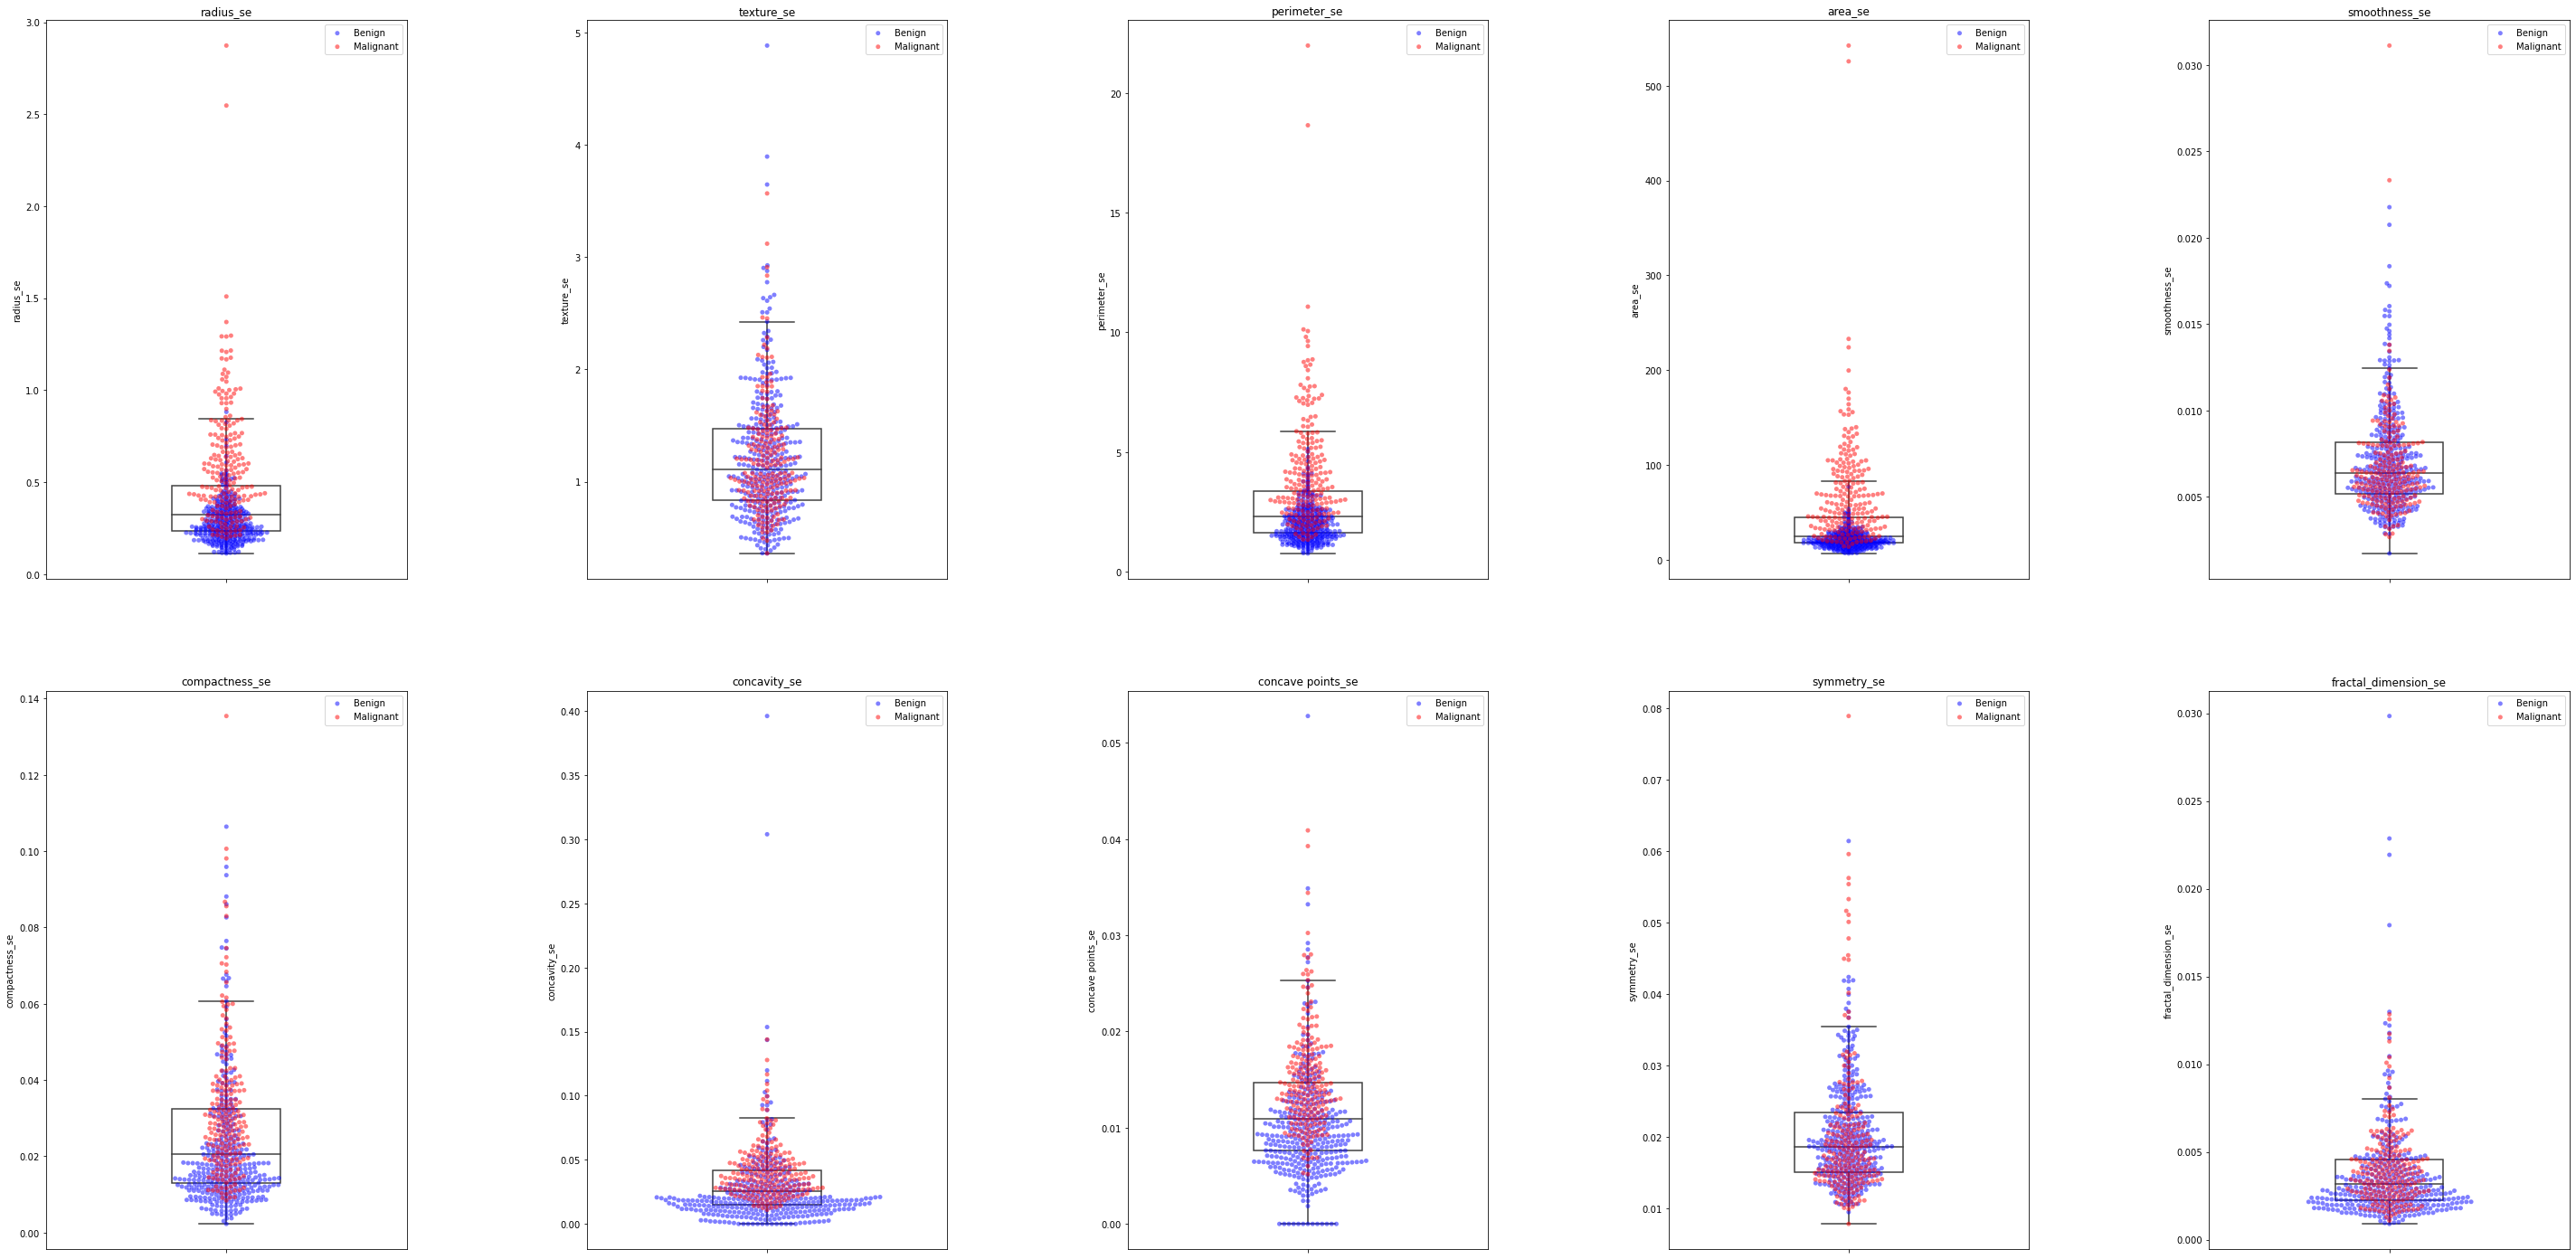

In [14]:
#SE features

plt.figure(1, figsize=(50, 25))

n = 0
for x in ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
            'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
            'fractal_dimension_se']:
    n += 1
    plt.subplot(2, 5, n)
    plt.subplots_adjust(hspace=0.2, wspace=0.5)  # Adjust spacing between subplots

    condition1 = df["diagnosis"] == "B"
    condition2 = df["diagnosis"] == "M" 
    sns.boxplot(data=df, y=x, width=0.3, showcaps=True, boxprops=dict(facecolor='none'), showfliers=False)
    sns.swarmplot(data=df.loc[condition1], y=x, color='blue', alpha=0.5, label='Benign') 
    sns.swarmplot(data=df.loc[condition2], y=x, color='red', alpha=0.5, label='Malignant')
    plt.legend()  # Agregar leyenda para identificar los colores
    plt.title('{}'.format(x))

plt.show()

In the previous graphs, it is evident that there are several outliers in most features, except for 'concave_points_worst,' for example. Notably, in the majority of cases, these outliers have values higher than the third quartile (Q3) or the upper quartile.

An interesting observation is that, once again, in geometric features, such as "radius", "perimeter" and "area", most of their outliers are data tagged as malignant carcinomas. This finding reveals how cell nuclei acquire extreme characteristics in terms of their morphology, directly associated with the state of cancer.

## Violin Plots

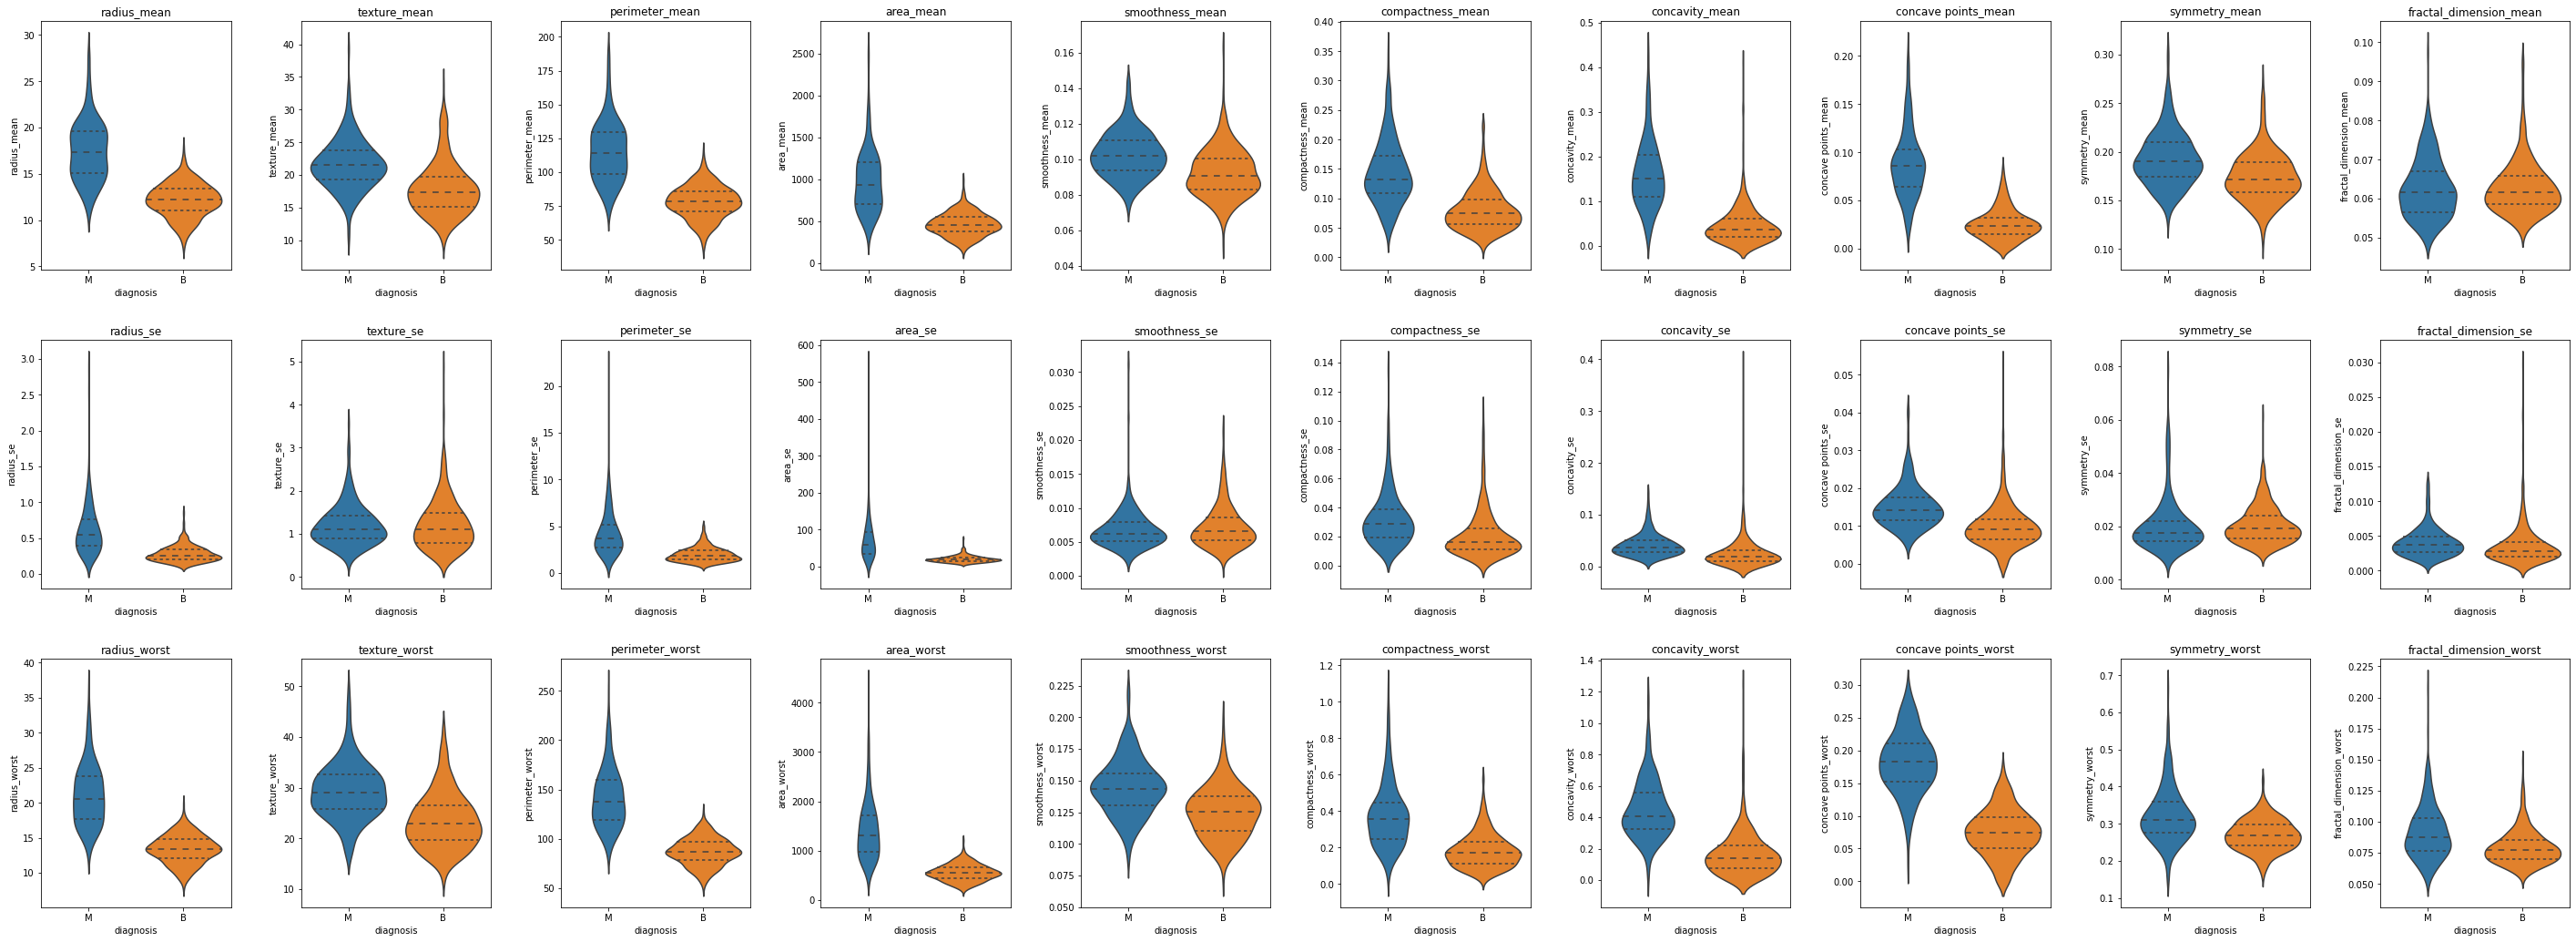

In [15]:
plt.figure(1, figsize=(40, 15))

n = 0 
for x in ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
          'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
          'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
          'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
          'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']:
    n += 1
    plt.subplot(3, 10, n)
    plt.subplots_adjust(hspace=3, wspace=3)
    plt.tight_layout(pad=3)
    ax = sns.violinplot(x="diagnosis", y=x, data=df, inner='quartile')
    plt.title('{}'.format(x))
    
plt.show()

There are several features that aid in distinguishing malignant from benign cancer, with many of them being related to the geometrical aspects of cell nuclei. Notably, malignant cancer demonstrates a higher dispersion in most features, often exhibiting extreme values.

# Correlation between variables

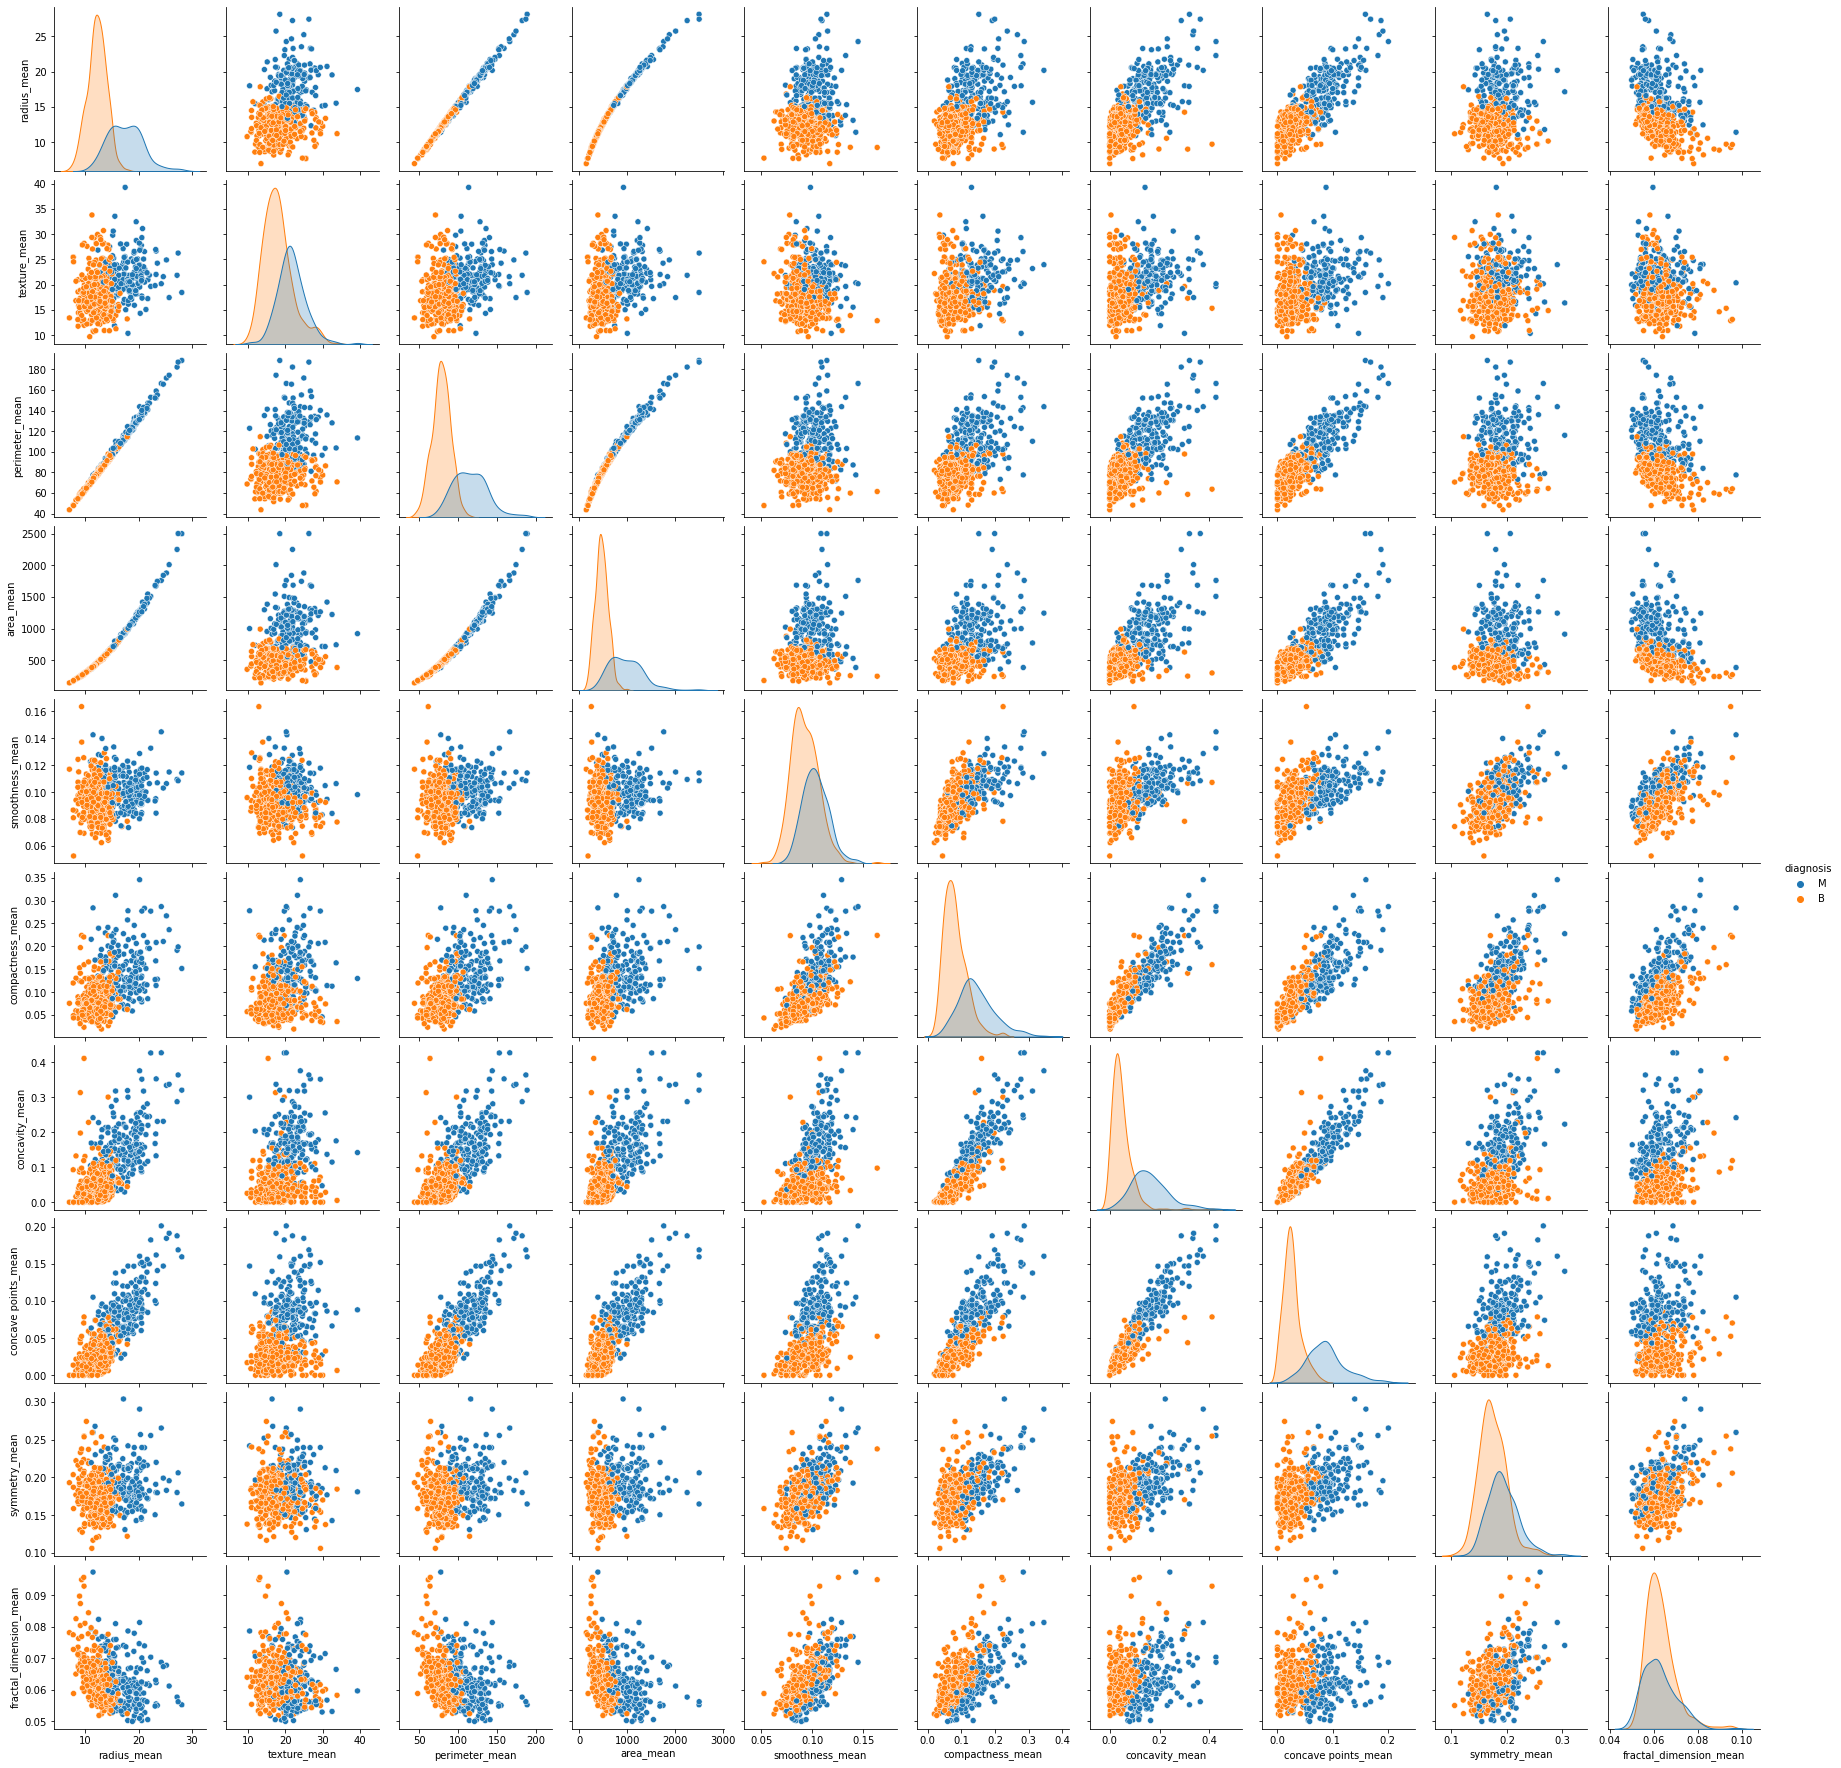

In [16]:
sns.pairplot(df, vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
          'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'], 
             hue = "diagnosis")


C:\Users\Julian\AppData\Local\Temp\ipykernel_6716\1459084687.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

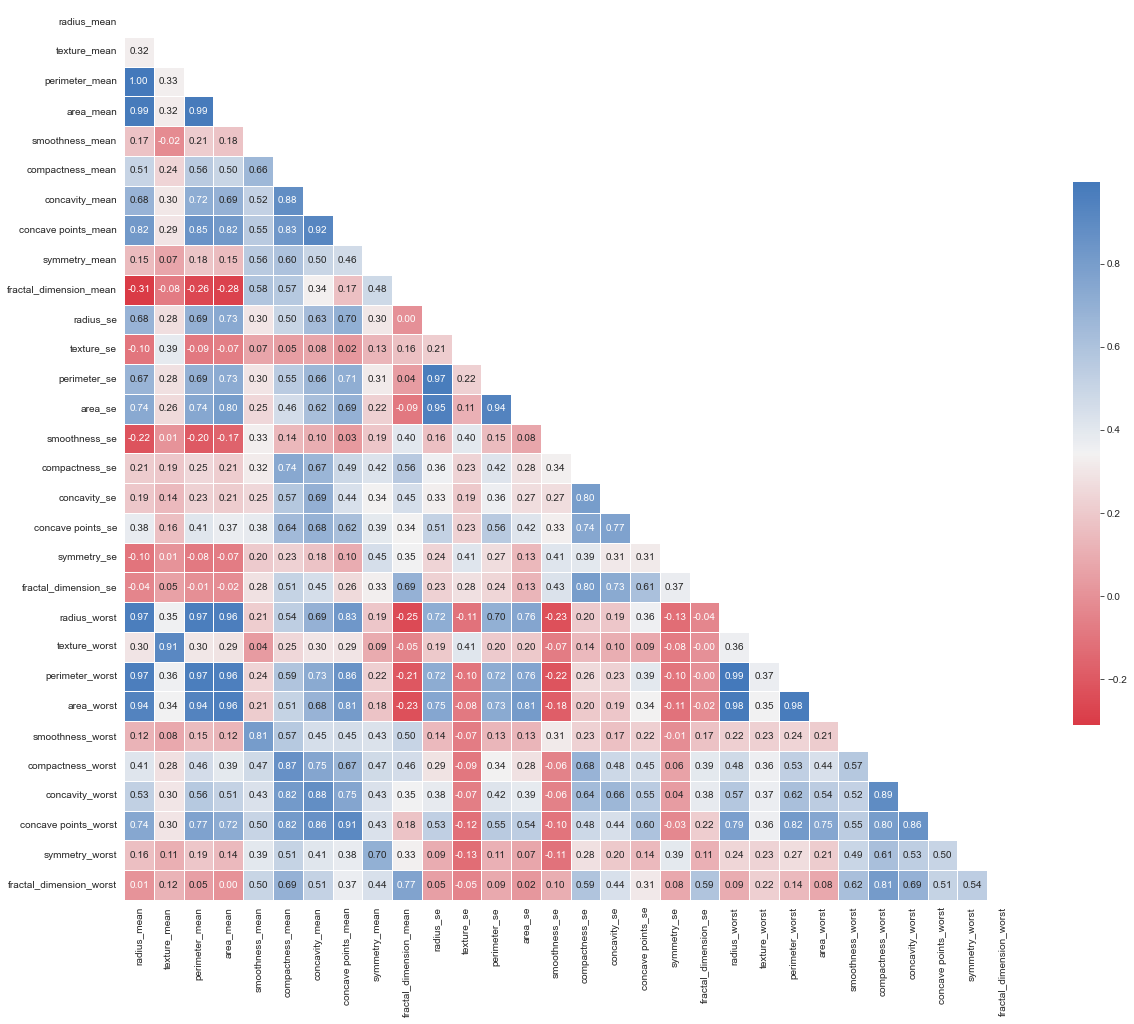

In [22]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, 
        annot=True, fmt=".2f", annot_kws={"fontsize": 10}, cbar_kws={"shrink": .5}, ax=ax)

# Class Distribution of target variable

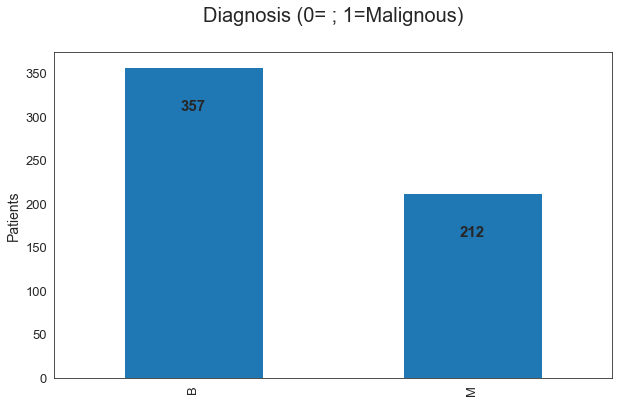

In [23]:
ax = df['diagnosis'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13)
ax.set_title('Diagnosis (0= Benign ; 1= Malign)', size=20, pad=30)
ax.set_ylabel('Patients', fontsize=14)

for i, value in enumerate( df['diagnosis'].value_counts()):
     ax.text(i - 0, value -50 , str(value), ha='center', fontsize=15, weight='bold')

The class distribution is unbalanced, if we train a binary classification model without fixing this problem, the model will be biased.

